In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, :2]  # sepal_length и sepal_width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lda = LDA()
lda.fit(X_train_scaled, y_train)

y_pred = lda.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of LDA model: {accuracy:.2f}")

Accuracy of LDA model: 0.84


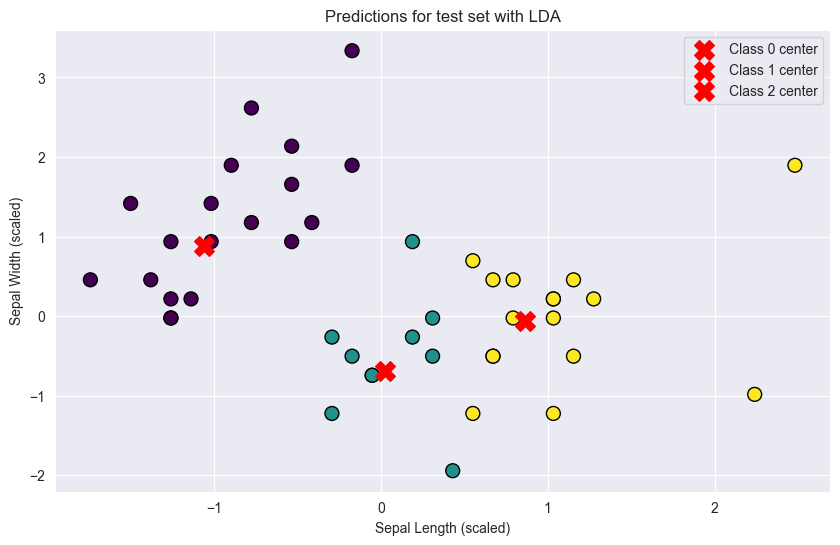

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title("Predictions for test set with LDA")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")

centers = lda.means_
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', marker='X', s=200, label=f"Class {i} center")

plt.legend()
plt.show()

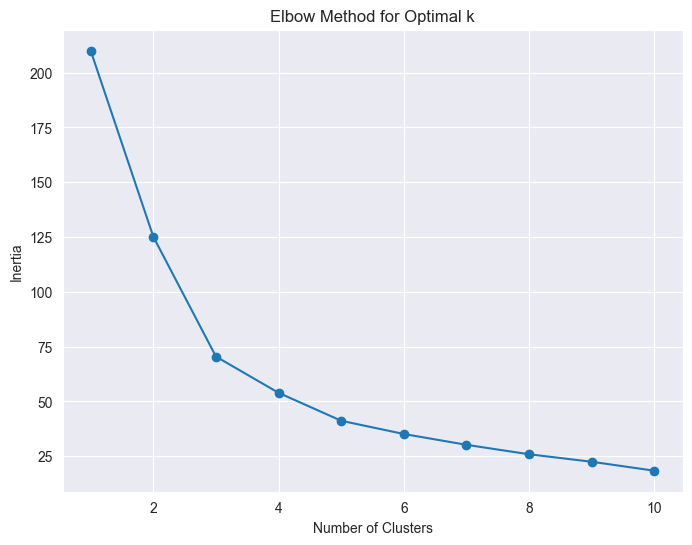

In [6]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

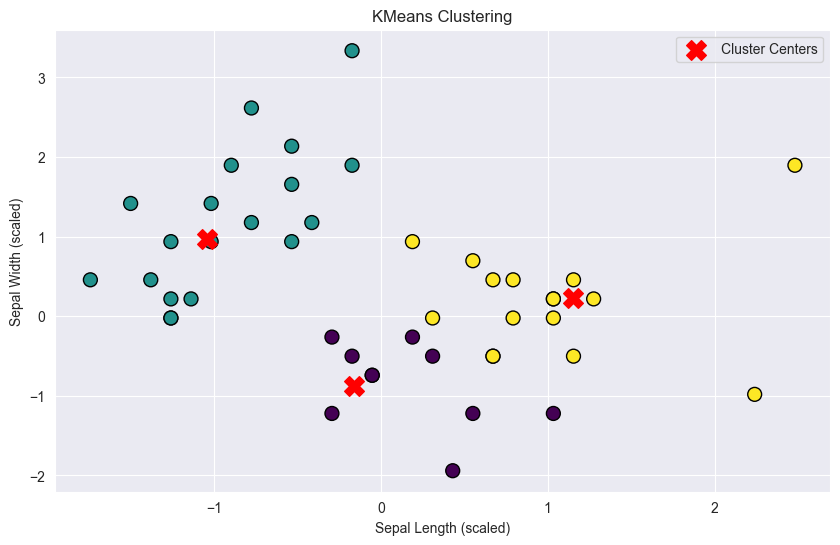

In [7]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_train_scaled)
y_kmeans = kmeans.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title("KMeans Clustering")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Cluster Centers")
plt.legend()
plt.show()